# Andres Graterol - 4031393 - Fall 22

# Homework 4 

In [283]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

## Dataset Generation

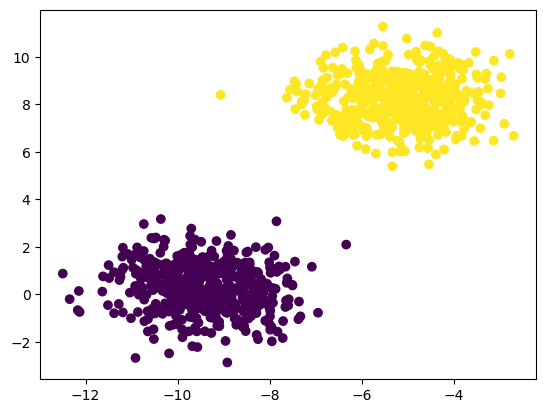

In [284]:
# Create 2D Gaussian Blobs
# Generate and plot 1000 samples from classes C1 and C2
X, y = make_blobs(n_samples=1000, centers=2)

plt.scatter(X[:,0], X[:,1], c=y)

In [319]:
# Obtain training and test data 
# 75/25 train/test split
y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

#print("x train: ", X_train)
#print("shape of x:", X_train.shape)
#print("t: ", y_train)
#print("shape of t:", y_train.shape)

#print("x test:", X_test)
#print("shape of x test:", X_test.shape)

## Least-squares Solution

In [341]:
# Create the matrix of augmented inputs 
def create_x_matrix(data_points):
    x_matrix = []
    
    for i in range(len(data_points)):
        row_array = [1, data_points[i][0], data_points[i][1]]
        x_matrix.append(row_array)
        
    x_matrix = np.array(x_matrix)
    
    return x_matrix

# Create the one hot encoding matrix
def create_t_matrix(labels):
    t_matrix = []
    
    for i in range(len(labels)):
        row_array = [1-labels[i], labels[i]]
        t_matrix.append(row_array)
        
    t_matrix = np.array(t_matrix)
    t_matrix = t_matrix.squeeze()
    
    return t_matrix

# Map a prediction to the class with the larger value
def map_to_class(prediction):
    if(prediction[0] > prediction[1]):
        # One-hot encoding for class 0
        prediction = [1, 0]
    else:
        # One-hot encoding for class 1
        prediction = [0, 1]
        
    return prediction;

# Compute the predictions and output them into an array
def compute_predictions(weights, test_data):
    prediction_matrix = []
    
    for i in range(len(test_data)):
        row_array = []
        xn = [1, test_data[i][0], test_data[i][1]]
        xn = np.array(xn)

        prediction = np.matmul(np.transpose(weights), xn)
        #print("prediction shape", prediction.shape)
        
        prediction = map_to_class(prediction)
        
        prediction_matrix.append(prediction)
        
    prediction_matrix = np.array(prediction_matrix)
    
    return prediction_matrix

def compute_test_accuracy(ground_truth, predictions):
    correct_count = 0;
    for i in range(len(ground_truth)):
        if(ground_truth[i][0] == predictions[i][0]):
            correct_count += 1
            
    accuracy = correct_count/len(predictions)
    
    return accuracy

In [342]:
X_mat = create_x_matrix(X_train)
print("Shape of x matrix:", X_mat.shape)

T = create_t_matrix(y_train)
print("Shape of t matrix:", T.shape)

weights = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_mat), X_mat)), np.matmul(np.transpose(X_mat), T))
print("Shape of the weights:", weights.shape)

Shape of x matrix: (750, 3)
Shape of t matrix: (750, 2)
Shape of the weights: (3, 2)


In [343]:
labels = create_t_matrix(y_test)
#print(labels)
#print("shape of test labels:", labels.shape)

predictions = compute_predictions(weights, X_test)
#print(predictions)
#print("shape of predictions:", predictions.shape)

accuracy = compute_test_accuracy(labels, predictions)
print(accuracy)

1.0


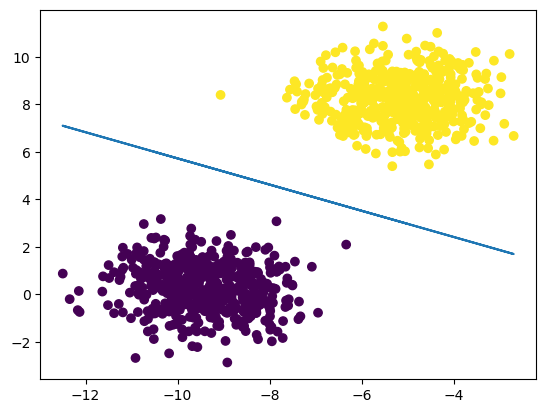

In [415]:
# Plotting the decision bondary 
# Column 1 (index 0) contains the 3 weights for the first class
# Column 2 (index 1) contains the 3 weights for the second class

#print(weights)
#print(weights[1][1])
slope = -(weights[1][0] - weights[1][1])/(weights[2][0] - weights[2][1])
intercept = -(weights[0][0] - weights[0][1])/(weights[2][0] - weights[2][1])

hyperplane = slope*X[:,0] + intercept

plt.plot(X[:,0], hyperplane)
#print(y)
plt.scatter(X[:,0], X[:,1], c=y)

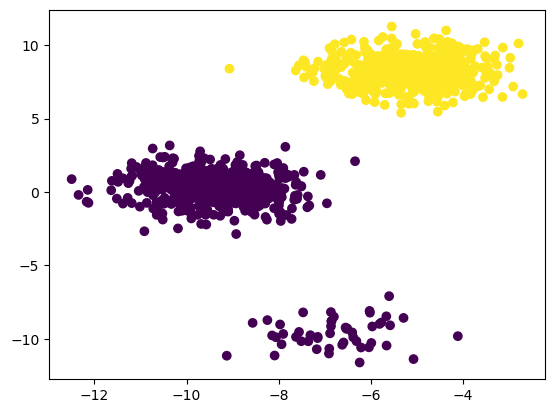

In [360]:
# Study the effect of outlier. Generate an additional blob of 50 points and add them to one of the classes
X_extra, y_extra = make_blobs(n_samples=50, centers=1)

plt.scatter(X_extra[:,0], X_extra[:,1], c=y_extra)
plt.scatter(X[:,0], X[:,1], c=y)

In [364]:
# Add the new blob to class 1 (y=0)
X_new = np.reshape(np.append(X, X_extra), (-1,2))
y_new = np.append(y, y_extra)
y_true_new = y_new[:, np.newaxis]

X_train_extra, X_test_extra, y_train_extra, y_test_extra = train_test_split(X_new, y_true_new)

#print("x train: ", X_train_extra)
#print("shape of x:", X_train_extra.shape)
#print("t: ", y_train_extra)
#print("shape of t:", y_train_extra.shape)

#print("x test:", X_test_extra)
#print("shape of x test:", X_test_extra.shape)

#plt.scatter(X[:,0], X[:,1], c=y)

Shape of x matrix: (787, 3)
Shape of t matrix: (787, 2)
Shape of the weights: (3, 2)


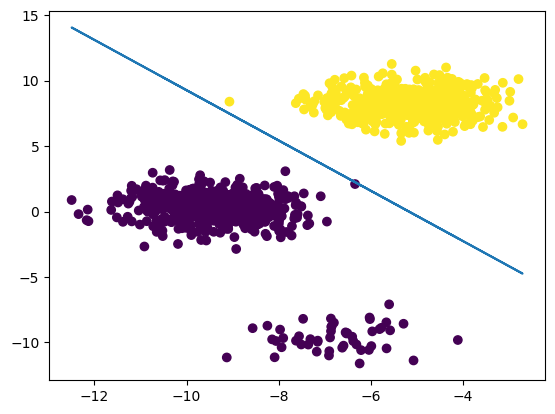

In [416]:
# Retrain the weights 
# Using the new training set 
X_mat_new = create_x_matrix(X_train_extra)
print("Shape of x matrix:", X_mat_new.shape)

T_new = create_t_matrix(y_train_extra)
print("Shape of t matrix:", T_new.shape)

weights_new = np.matmul(np.linalg.inv(np.matmul(np.transpose(X_mat_new), X_mat_new)), np.matmul(np.transpose(X_mat_new), T_new))
print("Shape of the weights:", weights_new.shape)

slope_new = -(weights_new[1][0] - weights_new[1][1])/(weights_new[2][0] - weights_new[2][1])
intercept_new = -(weights_new[0][0] - weights_new[0][1])/(weights_new[2][0] - weights_new[2][1])

hyperplane_new = slope_new*X_new[:,0] + intercept_new

plt.plot(X_new[:,0], hyperplane_new)
#print(y)
plt.scatter(X_new[:,0], X_new[:,1], c=y_new)

As can be seen, outliers make the decision boundary less accurate, even when visually, a decision boundary can easily be drawn

## FLD

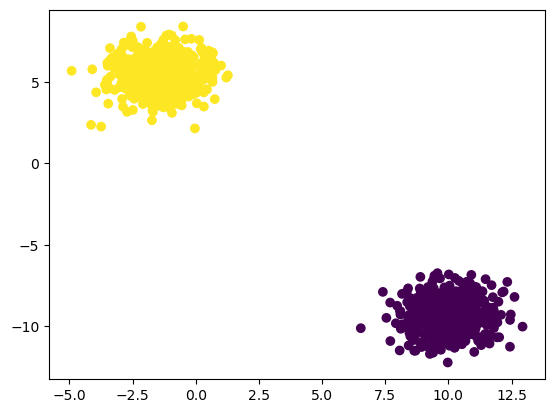

In [458]:
# Generate the blobs as before 
X, y = make_blobs(n_samples=1000, centers=2)
plt.scatter(X[:,0], X[:,1], c=y)

y_true = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

In [459]:
count_arr = np.bincount(y)

N1 = count_arr[0]
#print("Number of items in class 0:", N1)
N2 = count_arr[1]
#print("Number of items in class 1:", N2)

class1_indices = np.where(y==0)
class2_indices = np.where(y==1)

#print(class_1_indices)
#print(class_2_indices)

class1_sum = np.zeros(2)
class2_sum = np.zeros(2)
for i in range(len(X_train)):
    # Add values to class 1
    if (i in class1_indices[0]):
        #print(f"{i} is in class 1 indices")
        class1_sum = np.add(class1_sum, X_train[i])
        
    # Add values to class 2   
    else:
        class2_sum = np.add(class2_sum, X_train[i])
        
#print(class1_sum)
#print(class2_sum)

# Get the mean for each class
m1 = (1/N1)*class1_sum
m2 = (1/N2)*class2_sum
#print(m1)
#print(m2)

#Now compute the within-class covariance
# Covariances are 1x1
class1_covariance = np.zeros(1)
class2_covariance = np.zeros(1)

for i in range(len(X_train)):
    #Covariance for class 1 at point Xn
    if (i in class1_indices[0]):
        covar1 = np.matmul((X_train[i] - m1), np.transpose(X_train[i] - m1))
        class1_covariance = np.add(class1_covariance, covar1)
    
    else:
        covar2 = np.matmul((X_train[i] - m2), np.transpose(X_train[i] - m2))
        class2_covariance = np.add(class2_covariance, covar2)

#print(class1_covariance)
#print(class2_covariance)

Sw = class1_covariance + class2_covariance
#print(Sw)

# Find weights
w = (1/Sw)*(m2-m1)
#print(w)

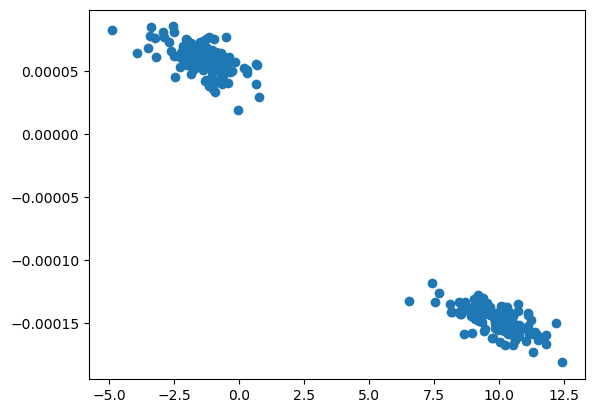

In [460]:
#Goal, list of y values    
projected_data = []

for i in range(len(X_test)):
    projection = np.matmul(np.transpose(w), X_test[i])
    projected_data.append(projection)
    
plt.scatter(X_test[:,0], projected_data)

In [461]:
def projections_to_class(thr, projections):
    class_labels = []
    
    for i in range(len(projections)):
        # if w^Tx is less than the threshold, assign to class 1 => 0
        if (projections[i] < thr):
            class_labels.append(0)
        else:
            class_labels.append(1)
    
    # Return prediction labels to compare to the ground truth 
    return class_labels

def calculate_accuracy(class_labels, ground_truth):
    correct_amount = 0
    for i in range(len(class_labels)):
        if (class_labels[i] == ground_truth[i]):
            correct_amount += 1
        
    return correct_amount/len(class_labels)

# Choose the threshold and compute the accuracy
# Look at the graph above to eyeball a threshold
thr = -0.00005
#print(projected_data)

class_labels = projections_to_class(thr, projected_data)

accuracy = calculate_accuracy(class_labels, y_test)

print("Test Accuracy: ", accuracy)

Test Accuracy:  1.0


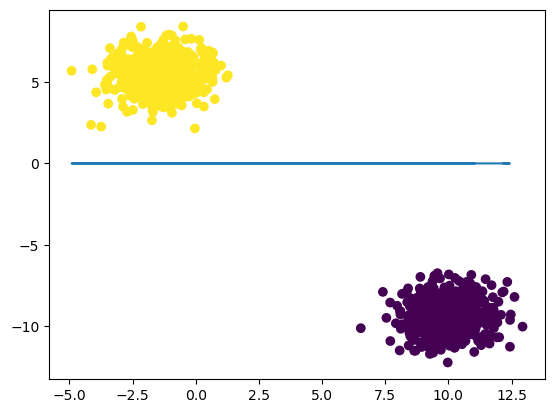

In [462]:
# Plot the dataset and the estimated decision boundary
boundary = [x - thr for x in projected_data]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(X_test[:,0], boundary)

The decision boundary does not perfectly divide the original dataset (boundary closer to one class than another) because the boundary was created based on a threshold value that was found using the testing data only!

## Perceptron Algorithm

In [380]:
class Perceptron():
    def __init__(self):
        pass
    
    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape
        
        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0
        
        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias
            
            # Step 2: Compute the output
            y_predict = self.step_function(a)
            
            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)
            
            # Step 4: Update the parameters
            self.weights += delta_w
            self.bias += delta_b
            
        return self.weights, self.bias
    
    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])[:,np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias

        return self.step_function(a)

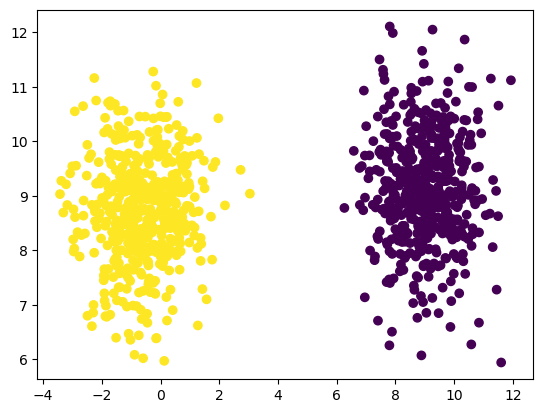

In [406]:
# Create a dataset using gaussian blobs
X_perceptron, y_perceptron = make_blobs(n_samples=1000, centers=2)

plt.scatter(X_perceptron[:,0], X_perceptron[:,1], c=y_perceptron)

# Split into training and testing sets
y_true_p = y_perceptron[:, np.newaxis]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perceptron, y_true_p)

In [407]:
# Create an instance of the perceptron class 
p = Perceptron()

# Train the weights and the bias
lr = 0.05
iterations = 500
p.train(X_train_p, y_train_p, lr, iterations)

(array([[-178.19022983],
        [  59.52071748]]),
 7.799999999999999)

In [408]:
# Function to compute the accuracy
def compute_accuracy(ground_truth, predictions):
    correct_count = 0;
    for i in range(len(ground_truth)):
        if(ground_truth[i] == predictions[i]):
            correct_count += 1
            
    accuracy = correct_count/len(predictions)
    
    return accuracy

In [409]:
# Obtain the predictions
# Training data first
training_prediction = p.predict(X_train_p)

print("Shape of y_train_p:", y_train_p.shape)
print("Shape of training prediction:", training_prediction.shape)

training_accuracy = compute_accuracy(y_train_p, training_prediction)
print("Training Accuracy:", training_accuracy)

testing_prediction = p.predict(X_test_p)

testing_accuracy = compute_accuracy(y_test_p, testing_prediction)
print("Testing Accuracy:", testing_accuracy)

Shape of y_train_p: (750, 1)
Shape of training prediction: (750, 1)
Training Accuracy: 1.0
Testing Accuracy: 1.0


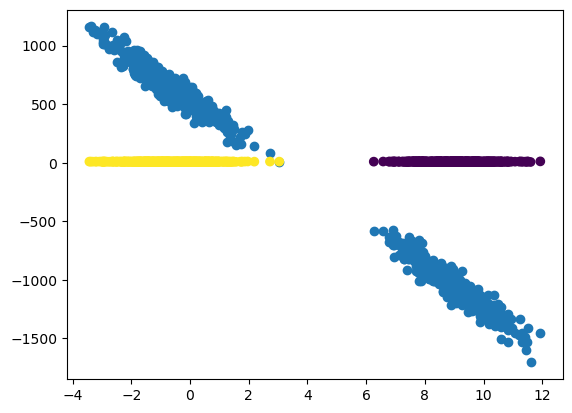

In [475]:
# Scatter plot of the dataset and the decision boundary
boundary = []
for i in range(len(X_perceptron)):
    point = np.matmul(np.transpose(p.weights), X_perceptron[i])
    boundary.append(point)
    
decision_boundary = [x + p.bias for x in boundary]

plt.scatter(X_perceptron[:,0], decision_boundary)
plt.scatter(X_perceptron[:,0], X_perceptron[:,1], c=y_perceptron)